In [1]:
%load_ext autoreload
%autoreload 2
import comp_capacity

import comp_capacity.repr
import comp_capacity.repr.network

In [381]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

/Users/richardhakim/Documents/github_repos/computational-capacity/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
n_nodes = 10

module_dict = {
    "linear": torch.nn.Linear,
}

nonlinearity_dict = {
    "relu": torch.nn.ReLU,
    "sigmoid": torch.nn.Sigmoid,
    "tanh": torch.nn.Tanh,
}

In [4]:
n_modules = len(module_dict)
n_nonlinearities = len(nonlinearity_dict)

module_namesIndex = {name: ii for ii, name in enumerate(module_dict.keys())}
nonlinearity_namesIndex = {name: ii for ii, name in enumerate(nonlinearity_dict.keys())}

In [5]:
print(module_namesIndex)
print(nonlinearity_namesIndex)

{'linear': 0}
{'relu': 0, 'sigmoid': 1, 'tanh': 2}


In [6]:
connectivity = (torch.rand(size=(n_nodes, n_nodes), dtype=torch.float32) * 2 - 1).triu(diagonal=1)
module = torch.ones(size=(n_nodes, n_modules), dtype=torch.bool) * torch.as_tensor([1, 0], dtype=torch.bool)[None, :]
nonlinearity = torch.ones(size=(n_nodes, n_nonlinearities), dtype=torch.bool) * torch.as_tensor([1, 0, 0], dtype=torch.bool)[None, :]

network = comp_capacity.repr.network.Network(
    matrices=comp_capacity.repr.network.MatrixContainer(
        connectivity=connectivity,
        module=module,
        nonlinearity=nonlinearity,
    )
)

In [7]:
network

Network. Constructor matrices: MatrixContainer: 
  Connectivity -- shape: torch.Size([10, 10]), dtype: torch.float32, device: cpu, requires_grad: False; 
  Module       -- shape: torch.Size([10, 2]), dtype: torch.bool, device: cpu, requires_grad: False; 
  Nonlinearity -- shape: torch.Size([10, 3]), dtype: torch.bool, device: cpu, requires_grad: False; 

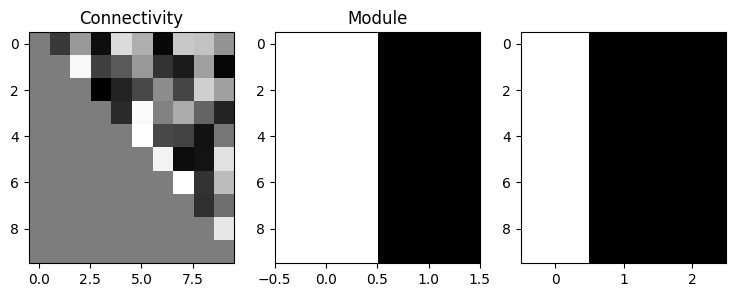

In [8]:
network.plot_matrices()

In [9]:
connectivity_constraint = torch.ones(size=(n_nodes, n_nodes), dtype=torch.bool).triu(diagonal=1)
module_constraint = torch.ones(size=(n_nodes, n_modules), dtype=torch.bool) * torch.as_tensor([1, 0], dtype=torch.bool)[None, :]
nonlinearity_constraint = torch.ones(size=(n_nodes, n_nonlinearities), dtype=torch.bool) * torch.as_tensor([1, 0, 0], dtype=torch.bool)[None, :]
connectivity_bounds = (-1.0, 1.0)
module_bounds = (1, 1)
nonlinearity_bounds = (1, 1)

sampler = comp_capacity.repr.network.Sampler_random(
    connectivity_constraint=connectivity_constraint,
    module_constraint=module_constraint,
    nonlinearity_constraint=nonlinearity_constraint,
    
    connectivity_bounds=connectivity_bounds,
    module_bounds=module_bounds,
    nonlinearity_bounds=nonlinearity_bounds,
    
    dtype_connectivity=torch.float32,
    dtype_module=torch.bool,
    dtype_nonlinearity=torch.bool,
)

In [10]:
network = sampler.forward(network=network)

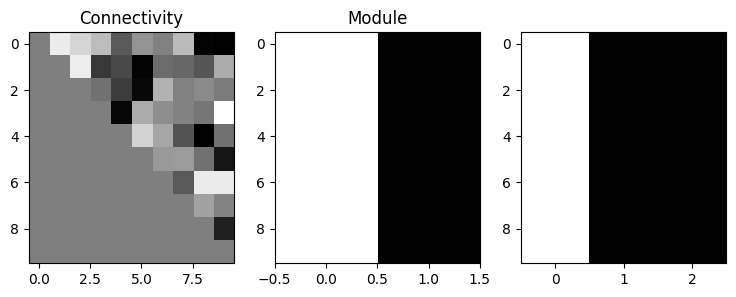

In [11]:
network.plot_matrices()